# Benchmarking RF vs OF on OpenML-CC18
Actual benchmarking run is done using `20220413_run_benchmark_openml_suites.py` script. We are using [obliquepr](https://github.com/neurodata/scikit-learn/tree/obliquepr) branch implementation of RF and OF. 

In [1]:
import pandas as pd
import numpy as np

import os
import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import cohen_kappa_score, accuracy_score

In [2]:
feat_labels = ['task', 'task_id', 'n_samples', 'n_features', 'n_classes', 'n_estimators', 'cv', 'sample_sizes']
meta = ['RF_metadata', 'OF_metadata']
meta_features = ['train_times', 'test_times']

In [3]:
meta_feat_labels = [i[:2]+'_'+j for i in meta for j in meta_features]
acc_labels = ['Delta_Cohen_Kappa', 'Delta_Accuracy']
meta_feat_labels

['RF_train_times', 'RF_test_times', 'OF_train_times', 'OF_test_times']

In [4]:
folder_path = r'/home/jshinm/Desktop/workstation/sporf/dev_notebook/dat/sporf_benchmarks/rerf/results_cv3_features=1'

all_labels = feat_labels + meta_feat_labels + acc_labels

df_meta = pd.DataFrame(columns=all_labels)

for folderpath, _, filelist in os.walk(folder_path):
    for fpath in filelist:
        with open(folderpath + '/' + fpath, 'rb') as f:
            dat = pickle.load(f)
        tmp = []
        for ft in feat_labels:
            tmp.append(dat[ft])
        for m in meta:
            for mft in meta_features:
                tmp.append(dat[m][mft])

        ct = 0
        delta_cohen_kappa = []
        delta_acc = []

        for sample_R, sample_O in zip(dat['RF'], dat['OF']):
            r = cohen_kappa_score(dat['y'][ct:ct+sample_R[0].shape[0]], sample_R[0].argmax(1))
            o = cohen_kappa_score(dat['y'][ct:ct+sample_O[0].shape[0]], sample_O[0].argmax(1))
            delta_cohen_kappa += [round(abs(r - o),5)]

            r = accuracy_score(dat['y'][ct:ct+sample_R[0].shape[0]], sample_R[0].argmax(1))
            o = accuracy_score(dat['y'][ct:ct+sample_O[0].shape[0]], sample_O[0].argmax(1))
            delta_acc += [round(abs(r - o),5)]

            ct += sample_R[0].shape[0]

        tmp.append(delta_cohen_kappa)
        tmp.append(delta_acc)

        df_meta = pd.concat([df_meta, pd.DataFrame([tmp], columns=all_labels)])

In [5]:
df_meta2 = df_meta.T
df_meta2.columns = df_meta2.iloc[0,:]
df_meta2.T

,task,task_id,n_samples,n_features,n_classes,n_estimators,cv,sample_sizes,RF_train_times,RF_test_times,OF_train_times,OF_test_times,Delta_Cohen_Kappa,Delta_Accuracy
task,,,,,,,,,,,,,,
steel-plates-fault,steel-plates-fault,146817,1941,27,7,500,3,[1941],"[3.260160207748413, 2.7348530292510986, 2.4898...","[0.2955291271209717, 0.23289036750793457, 0.25...","[2.267183542251587, 2.3536274433135986, 2.3361...","[0.8335340023040771, 0.5347645282745361, 0.277...","[0.0103, 0.00902, 0.0]","[0.01391, 0.01236, 0.01236]"
semeion,semeion,9964,1593,256,10,500,3,[1593],"[4.548173904418945, 4.487351417541504, 4.47540...","[0.09201931953430176, 0.09173345565795898, 0.0...","[2.266430377960205, 2.280595541000366, 2.24426...","[0.09394598007202148, 0.09754037857055664, 0.0...","[0.00424, 0.00637, 0.00037]","[0.00377, 0.00565, 0.0]"
kc2,kc2,3913,522,21,2,500,3,[522],"[0.9979434013366699, 0.9775979518890381, 1.027...","[0.06015443801879883, 0.05830526351928711, 0.0...","[0.9195306301116943, 0.8717770576477051, 0.923...","[0.05771970748901367, 0.0581510066986084, 0.05...","[0.00257, 0.0, 0.02676]","[0.00575, 0.00575, 0.01724]"
ilpd,ilpd,9971,583,10,2,500,3,[583],"[1.2123847007751465, 1.2549643516540527, 1.209...","[0.061106204986572266, 0.05675625801086426, 0....","[1.2143068313598633, 1.227055311203003, 1.1786...","[0.059885501861572266, 0.06002235412597656, 0....","[0.02411, 0.00068, 0.00419]","[0.01538, 0.00515, 0.00515]"
mfeat-karhunen,mfeat-karhunen,16,2000,64,10,500,3,[2000],"[3.9822373390197754, 4.016489267349243, 4.1489...","[0.17145586013793945, 0.1599283218383789, 0.29...","[5.182862997055054, 4.721200227737427, 5.24176...","[0.6687259674072266, 0.28639721870422363, 0.33...","[0.0005, 0.00121, 0.0015]","[0.0015, 0.0015, 0.0015]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pendigits,pendigits,32,10992,16,10,500,3,[10992],"[6.200153112411499, 6.101717233657837, 6.15036...","[0.4499025344848633, 0.7290031909942627, 1.327...","[7.91579008102417, 7.62638258934021, 7.7500679...","[1.9593255519866943, 1.9561738967895508, 1.360...","[0.0003, 0.0003, 0.00031]","[0.00027, 0.00027, 0.00027]"
wdbc,wdbc,9946,569,30,2,500,3,[569],"[0.7542238235473633, 0.7519979476928711, 0.777...","[0.06003284454345703, 0.05835723876953125, 0.0...","[0.7586102485656738, 0.7746179103851318, 0.782...","[0.05880475044250488, 0.056769371032714844, 0....","[0.01023, 0.0, 0.00516]","[0.00526, 0.0, 0.00529]"
Fashion-MNIST,Fashion-MNIST,146825,70000,784,10,500,3,[70000],"[74.64509153366089, 84.07124137878418, 87.8630...","[4.326461553573608, 5.208355903625488, 6.00353...","[68.0619568824768, 52.834041595458984, 53.5453...","[4.492639541625977, 5.682873010635376, 4.90808...","[0.00074, 6e-05, 0.00134]","[0.00069, 4e-05, 0.0012]"


In [6]:
ttmp = df_meta[['task'] + meta_feat_labels + acc_labels]
ttmp = ttmp.explode(meta_feat_labels + acc_labels)
ttmp = ttmp.reset_index(drop=True)
ttmp

,task,RF_train_times,RF_test_times,OF_train_times,OF_test_times,Delta_Cohen_Kappa,Delta_Accuracy
0,steel-plates-fault,3.26016,0.295529,2.267184,0.833534,0.0103,0.01391
1,steel-plates-fault,2.734853,0.23289,2.353627,0.534765,0.00902,0.01236
2,steel-plates-fault,2.489863,0.258778,2.336166,0.277778,0.0,0.01236
3,semeion,4.548174,0.092019,2.26643,0.093946,0.00424,0.00377
4,semeion,4.487351,0.091733,2.280596,0.09754,0.00637,0.00565
...,...,...,...,...,...,...,...
187,letter,22.311363,0.229607,20.917633,0.457141,0.0003,0.0003
188,letter,23.518111,0.226921,20.146338,0.44408,0.00062,0.0006
189,qsar-biodeg,1.600591,0.079673,0.86599,0.073877,0.02808,0.03693
190,qsar-biodeg,1.60317,0.074174,0.880879,0.072417,0.0,0.02557


In [7]:
df_final = pd.DataFrame(columns=['task', 'y', 'label'])

for lb in meta_feat_labels + acc_labels:
    tmp = ttmp[['task', lb]]
    tmp['label'] = lb
    tmp.columns = ['task', 'y', 'label']
    df_final = pd.concat([df_final, tmp])

/tmp/ipykernel_588627/2034312563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['label'] = lb
/tmp/ipykernel_588627/2034312563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['label'] = lb
/tmp/ipykernel_588627/2034312563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [8]:
df_final

,task,y,label
0,steel-plates-fault,3.26016,RF_train_times
1,steel-plates-fault,2.734853,RF_train_times
2,steel-plates-fault,2.489863,RF_train_times
3,semeion,4.548174,RF_train_times
4,semeion,4.487351,RF_train_times
...,...,...,...
187,letter,0.0003,Delta_Accuracy
188,letter,0.0006,Delta_Accuracy
189,qsar-biodeg,0.03693,Delta_Accuracy
190,qsar-biodeg,0.02557,Delta_Accuracy


## Benchmark for time complexity

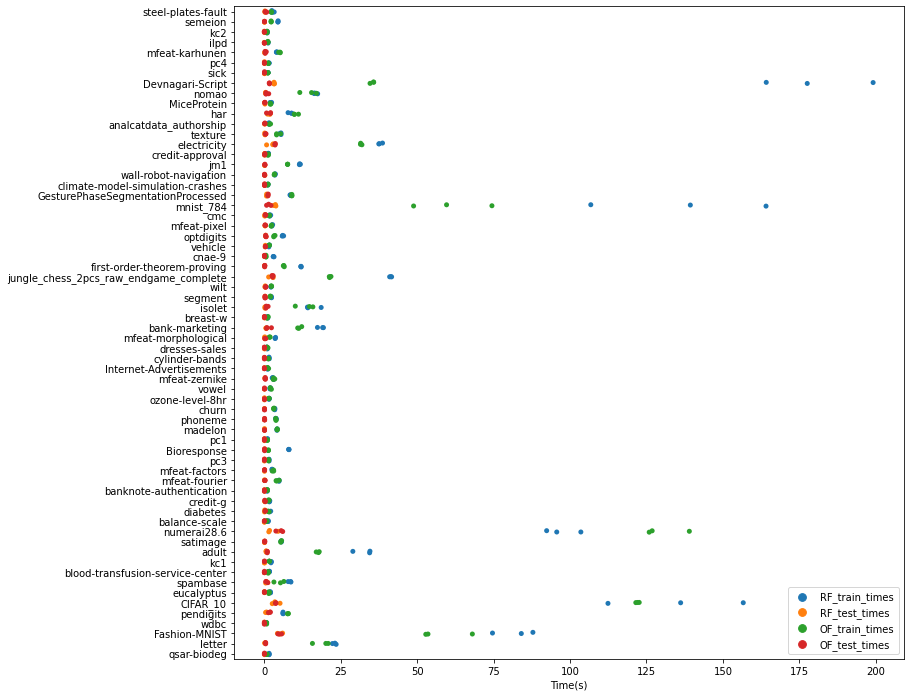

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12, 12))

sns.stripplot(x='y', y='task', data=df_final.loc[~df_final['label'].isin(acc_labels)], hue='label', ax=ax)
ax.set_xlabel('Time(s)')
ax.set_ylabel('')
ax.legend(title='', loc=4)
fig.savefig('figures/cc18_strip_tc.jpg')

## Benchmark for delta cohen_kappa/accuracy

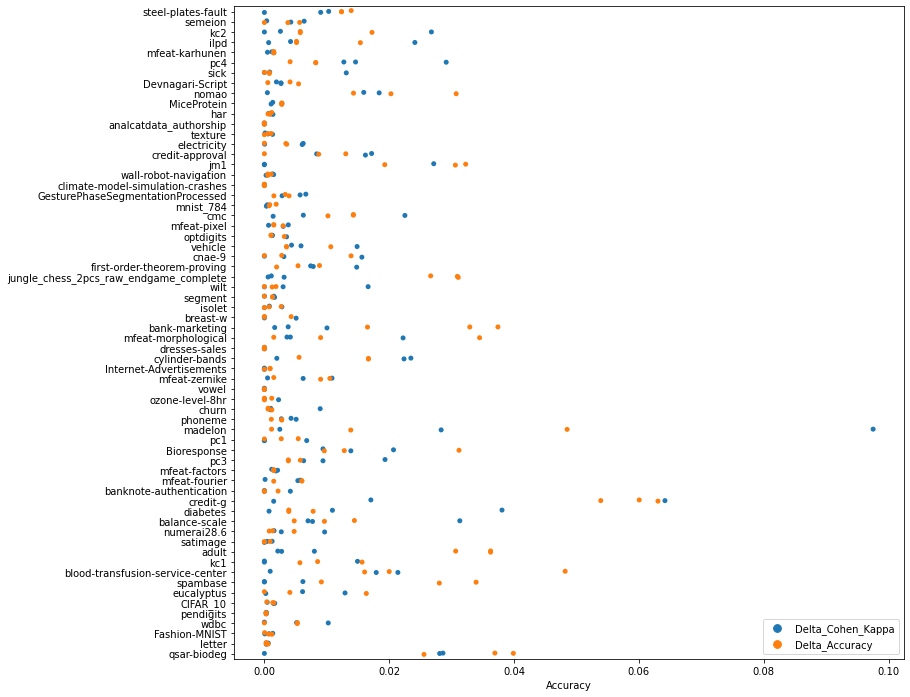

In [10]:
fig, ax = plt.subplots(1,1,figsize=(12, 12))

sns.stripplot(x='y', y='task', data=df_final.loc[df_final['label'].isin(acc_labels)], hue='label', ax=ax)
ax.set_xlabel('Accuracy')
ax.set_ylabel('')
ax.legend(title='', loc=4)
fig.savefig('figures/cc18_strip_acc.jpg')